Notebook for visualising rmse in vertex position according to motion tracking verification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

## All 30 Cases

all_cases = ['01', '02', '05', '06', '07', '08', '09', '12', '14',
             '15', '16', '17', '18', '21', '24', '27', '28', '29', '30',
             '32', '10', '19', '20', '23', '26', '31', '25', '34']
all_cases = [f"CT-CRT/case{case}" for case in all_cases]

ebr=['EBR/case01', 'EBR/case02']

all_cases=all_cases+ebr

len(all_cases)

## 20 frame cases
f20_cases = ['21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '34']
f20_cases = [f'CT-CRT/case{case_ind}' for case_ind in f20_cases]
ebr=['EBR/case01', 'EBR/case02']
f20_cases = f20_cases + ebr

# Point-by-Point vertex Discordance

## Maximal RMSE and RMSE at t=40%

In [2]:
rms_max = np.zeros((len(all_cases),))
rms_40 = np.zeros((len(all_cases),))

for i in range(0,len(all_cases)):
    
    case=all_cases[i]
    
    if case in f20_cases:
        path=f"/home/csi20/Dropbox/phd/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9/veri_TSFFD/rms_verification.txt"
    
    else:
        path=f"/home/csi20/Dropbox/phd/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9/veri_TSFFD/rms_verification.txt"
        
    data=np.loadtxt(path)
    
    rms_max[i] = max(data)
    rms_40[i] = data[3]

OSError: /home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case21/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9/veri_TSFFD/rms_verification.txt not found.

Mean pm Std RMS at t=40 %				 0.6267125383019447 $ \pm $ 0.5197354367875268
Mean pm Std RMS at worst performing frame		 0.7479481622576714 \pm 0.6292396771079322


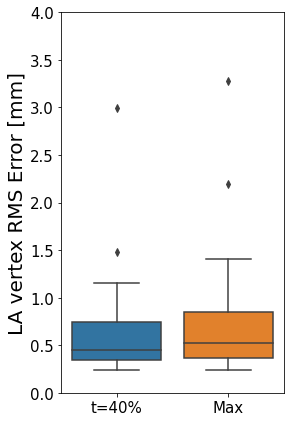

In [3]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,7), facecolor='white', sharey=True)

data=[rms_40, rms_max]
sns.boxplot(ax=ax1, data=data, orient='v')

plt.ylabel("LA vertex RMS Error [mm]", fontsize=20)
plt.xticks(np.arange(2), ['t=40%', 'Max'], fontsize=15)
plt.yticks(np.arange(0.0, 4.5, 0.5), fontsize=15
          )
plt.ylim(0.0, 4.0)

mean_40 = np.mean(rms_40)
std_40 = np.std(rms_40)

mean=np.mean(rms_max)
std=np.std(rms_max)

print("Mean pm Std RMS at t=40 %\t\t\t\t", mean_40, "$ \\pm $",  std_40)
print("Mean pm Std RMS at worst performing frame\t\t", mean, "\pm", std)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/Presentations/Cemrg_25_11_2022/rmse.png", dpi=200, bbox_inches="tight")
# plt.text(-0.5, 3.5, f"$\mu$ = {np.round(mean_40} $\pm$ {std_40}")

In [4]:
np.median(rms_40)

0.44914793968200684

Mean pm Std RMS at t=40 %				 0.6267125383019447 \pm 0.5197354367875268
Mean pm Std RMS at worst performing frame		 0.7479481622576714 \pm 0.6292396771079322


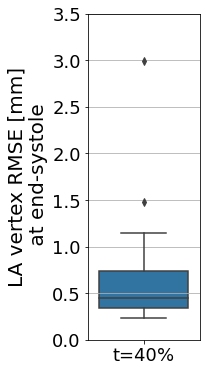

In [5]:
fig, (ax1) = plt.subplots(1,1,figsize=(2,6), facecolor='white', sharey=True)

data=[rms_40]
sns.boxplot(ax=ax1, data=data, orient='v')

plt.ylabel("LA vertex RMSE [mm]\n at end-systole", fontsize=20)
plt.xticks(np.arange(1), ['t=40%'], fontsize=18)
plt.yticks(np.arange(0.0, 4.0, 0.5), fontsize=18
          )
plt.ylim(0.0, 3.5)

mean_40 = np.mean(rms_40)
std_40 = np.std(rms_40)

mean=np.mean(rms_max)
std=np.std(rms_max)

ax1.grid(axis='y')

print("Mean pm Std RMS at t=40 %\t\t\t\t", mean_40, "\pm",  std_40)
print("Mean pm Std RMS at worst performing frame\t\t", mean, "\pm", std)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/Presentations/Cemrg_25_11_2022/rmse.png", dpi=200, bbox_inches="tight")
# plt.text(-0.5, 3.5, f"$\mu$ = {np.round(mean_40} $\pm$ {std_40}")

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/GOLDEN_slides/rmse_ES_2.png", dpi=200, bbox_inches="tight")

# Area Strain
## Cell-by-Cell RMSE

In [6]:
## area strain

strain_rms_max = np.zeros((len(all_cases),))
strain_rms_40 = np.zeros((len(all_cases),))

for i in range(0,len(all_cases)):
    case=all_cases[i]
#     print(case)
    
    if case in f20_cases:
        path=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9/veri/area_strain_rmse.txt"
    
    else:
        path=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9/veri/area_strain_rmse.txt"
        
    data=np.loadtxt(path)
    
    strain_rms_max[i] = max(data)
    strain_rms_40[i] = data[3]

Mean pm Std RMS at t=40 %				 0.15498158104534576 \pm 0.0943625358968573
Mean pm Std RMS at worst performing frame		 0.17784513055686213 \pm 0.11986561844091483


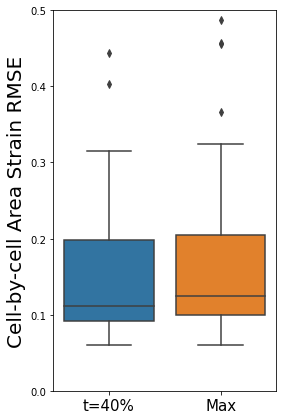

In [7]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,7), facecolor='white', sharey=True)

data=[strain_rms_40, strain_rms_max]
sns.boxplot(ax=ax1, data=data, orient='v')

plt.ylabel("Cell-by-cell Area Strain RMSE", fontsize=20)
plt.xticks(np.arange(2), ['t=40%', 'Max'], fontsize=15)
# plt.yticks(np.arange(0.0, 4.5, 0.5), fontsize=15
#           )
plt.ylim(0.0, 0.5)

mean_40 = np.mean(strain_rms_40)
std_40 = np.std(strain_rms_40)

mean=np.mean(strain_rms_max)
std=np.std(strain_rms_max)

print("Mean pm Std RMS at t=40 %\t\t\t\t", mean_40, "\pm",  std_40)
print("Mean pm Std RMS at worst performing frame\t\t", mean, "\pm", std)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/Presentations/Cemrg_25_11_2022/area_strain_cell_rmse.png", dpi=200, bbox_inches="tight")
# plt.text(-0.5, 3.5, f"$\mu$ = {np.round(mean_40} $\pm$ {std_40}")

## Global Transients RMSE

In [8]:
## area strain

global_rmse = np.zeros((len(all_cases),))

for i in range(0,len(all_cases)):
    case=all_cases[i]
#     print(case)
    
    if case in f20_cases:
        trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"
        veriTrackingPath=f"{trackingPath}/veri"
        
        global_gtPath = f"{trackingPath}/area_meanstrains_global_excl_PVs.txt"
        global_simPath = f"{veriTrackingPath}/area_meanstrains_global_excl_PVs.txt"
            
    else:
        trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"
        veriTrackingPath=f"{trackingPath}/veri"
        
        global_gtPath = f"{trackingPath}/area_meanstrains_global_excl_PVs.txt"
        global_simPath = f"{veriTrackingPath}/area_meanstrains_global_excl_PVs.txt"
                
    data_gt=np.loadtxt(global_gtPath)
    data_sim=np.loadtxt(global_simPath)
    
    ## calc rmse over all time frames
    rmse=mean_squared_error(data_gt, data_sim, squared=False)
#     print("Case: ", case, ": ", rmse)
    
    global_rmse[i] = rmse
    
global_rmse=global_rmse/100.

([<matplotlib.axis.XTick at 0x7fee70dc52e0>], [Text(0, 0, ' ')])

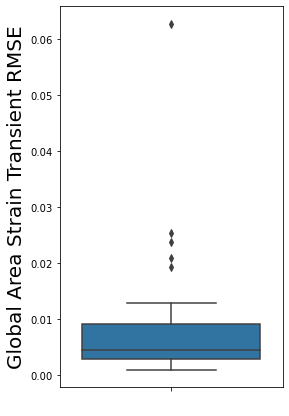

In [9]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,7), facecolor='white', sharey=True)

data=[global_rmse]
sns.boxplot(ax=ax1, data=data, orient='v')

plt.ylabel("Global Area Strain Transient RMSE", fontsize=20)
plt.xticks(np.arange(1), [' '], fontsize=15)

In [10]:
global_rmse = global_rmse*100

In [11]:
global_rmse.std()

1.201709125307775

We therefore see that, on a cell-by-cell basis, there is significant variation in area strain. Whereas, with a global picture, there is much more agreement. This gives us stronger confidence when reporting strains as global means.

Use this part of the notebook to generate GT and copmtued strain curves for comparison

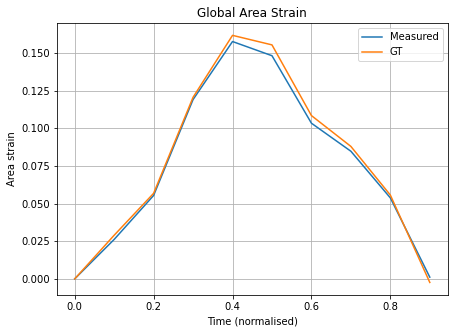

In [12]:
## Visualising cases' global mean strain transients

case='CT-CRT/case08'
# case='EBR/case02'

if case in f20_cases:
    trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"
    veriTrackingPath=f"{trackingPath}/veri"

    global_gtPath = f"{trackingPath}/area_meanstrains_global_excl_PVs.txt"
    global_simPath = f"{veriTrackingPath}/area_meanstrains_global_excl_PVs.txt"

else:
    trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"
    veriTrackingPath=f"{trackingPath}/veri"

    global_gtPath = f"{trackingPath}/area_meanstrains_global_excl_PVs.txt"
    global_simPath = f"{veriTrackingPath}/area_meanstrains_global_excl_PVs.txt"
    
data_gt=np.loadtxt(global_gtPath)
data_sim=np.loadtxt(global_simPath)

data_gt=data_gt/100.
data_sim=data_sim/100.

fig, (ax1) = plt.subplots(1,1,figsize=(7,5))

numTimes=10
normTime=np.arange(0, numTimes)/numTimes

ax1.plot(normTime, data_sim, label="Measured")
ax1.plot(normTime, data_gt, label='GT')

ax1.set_title(f'Global Area Strain')

ax1.set(xlabel='Time (normalised)')
ax1.set(ylabel='Area strain')
ax1.label_outer()
ax1.legend()
ax1.grid(True)

# plt.savefig("/home/csi20local/Documents/Presentations/Cemrg_25_11_2022/area_strain_global_transient.png", dpi=200, bbox_inches="tight")

## Regional Transients RMSE

In [13]:
## Regional RMSE
## testing for one case

for region in ['lat', 'ant', 'post', 'sept', 'roof']:
    print(region)

    basePath="/home/csi20local/Data/RG_CT_Cases/CT-CRT/case01/MT-HiRes/SW-0.0-BE-1e-9"

    gt_global = np.loadtxt(f"{basePath}/area_meanstrains_{region}_excl_PVs.txt")
    sim_global = np.loadtxt(f"{basePath}/veri/area_meanstrains_{region}_excl_PVs.txt")

    ans = mean_squared_error(gt_global, sim_global, squared=False) ## over all time frames
    
    print(ans)

lat
0.6442202829902698
ant
0.4821156462527637
post
0.3232035154808222
sept
0.7621314485834559
roof
0.8083802482313472


roof
sept
lat
ant
post


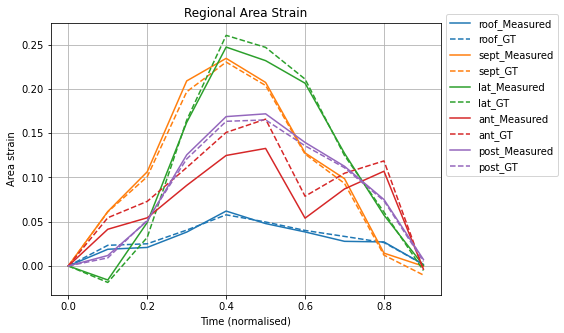

In [14]:
## Visualising cases' global mean strain transients

case='CT-CRT/case08'
# case='EBR/case02'

regions=['roof', 'sept', 'lat', 'ant', 'post']

regional_strains_sim=np.zeros((len(regions), 10)) 
regional_strains_gt=np.zeros((len(regions), 10)) 

for j in range(0, len(regions)):
        region=regions[j]
        print(region)
    
        if case in f20_cases:
            trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"
            veriTrackingPath=f"{trackingPath}/veri"

            global_gtPath = f"{trackingPath}/area_meanstrains_{region}_excl_PVs.txt"
            global_simPath = f"{veriTrackingPath}/area_meanstrains_{region}_excl_PVs.txt"

        else:
            trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"
            veriTrackingPath=f"{trackingPath}/veri"

            global_gtPath = f"{trackingPath}/area_meanstrains_{region}_excl_PVs.txt"
            global_simPath = f"{veriTrackingPath}/area_meanstrains_{region}_excl_PVs.txt"
            
        regional_strains_gt[j,:]=np.loadtxt(global_gtPath)
        regional_strains_sim[j,:]=np.loadtxt(global_simPath)
    
regional_strains_sim=regional_strains_sim/100.
regional_strains_gt=regional_strains_gt/100.

# data_sim=data_sim/100.

##Plot

fig, (ax1) = plt.subplots(1,1,figsize=(7,5))

numTimes=10
normTime=np.arange(0, numTimes)/numTimes

colors_list=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

for i in range(0, len(regions)):
    ax1.plot(normTime, regional_strains_sim[i,:], label=f"{regions[i]}_Measured", c=colors_list[i])
    ax1.plot(normTime, regional_strains_gt[i,:], label=f"{regions[i]}_GT", ls='--', c=colors_list[i])
#     ax1.plot(normTime, regional_strains_gt[i,:], label="GT", ls='--')
    
ax1.set_title(f'Regional Area Strain')

ax1.set(xlabel='Time (normalised)')
ax1.set(ylabel='Area strain')
ax1.label_outer()
ax1.legend(bbox_to_anchor=(1.0, 1.05))
ax1.grid(True)

# plt.savefig("/home/csi20local/Documents/Presentations/Cemrg_25_11_2022/area_strain_regional_transient.png", dpi=200, bbox_inches="tight")

In [15]:
## area strain

regions=['global', 'roof', 'sept', 'lat', 'ant', 'post']
regional_rmse = np.zeros((len(all_cases), len(regions)))

for i in range(0,len(all_cases)):
    case=all_cases[i]
#     print(case)

    for j in range(0, len(regions)):
        region=regions[j]
#         print(region)
    
        if case in f20_cases:
            trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"
            veriTrackingPath=f"{trackingPath}/veri"

            global_gtPath = f"{trackingPath}/area_meanstrains_{region}_excl_PVs.txt"
            global_simPath = f"{veriTrackingPath}/area_meanstrains_{region}_excl_PVs.txt"

        else:
            trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"
            veriTrackingPath=f"{trackingPath}/veri"

            global_gtPath = f"{trackingPath}/area_meanstrains_{region}_excl_PVs.txt"
            global_simPath = f"{veriTrackingPath}/area_meanstrains_{region}_excl_PVs.txt"
        
        data_gt=np.loadtxt(global_gtPath)
        data_sim=np.loadtxt(global_simPath)
    
        ## calc rmse over all time frames
        rmse=mean_squared_error(data_gt, data_sim, squared=False)
#         print("Case: ", case, "Region", region, ": ", rmse)
    
        regional_rmse[i,j] = rmse
        
regional_rmse=regional_rmse/100.0

In [16]:
for i in range(0, len(regions)):
    
    mu = regional_rmse[:, i].mean()*100
    sigma = regional_rmse[:, i].std()*100
    
    print(regions[i], "\t", mu, "pm\t", sigma)

global 	 0.8844597976741402 pm	 1.201709125307775
roof 	 1.177694958373449 pm	 0.9171516548574177
sept 	 1.8208086987646883 pm	 1.7103650113275428
lat 	 4.19324293925043 pm	 4.794000899315584
ant 	 1.6430044023319264 pm	 1.043466719455182
post 	 1.8753359098405098 pm	 2.89391868019544


In [21]:
np.median(regional_rmse[:, 0])

0.004340200903413517

In [23]:
for i in range(0, len(regions)):
    
    median = np.median(regional_rmse[:, i])*100
    
    print(regions[i], "\t", median)

global 	 0.43402009034135175
roof 	 0.7847464100809511
sept 	 1.4927769437515492
lat 	 2.034130827613614
ant 	 1.341612460175861
post 	 1.2748124812887847


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (7).

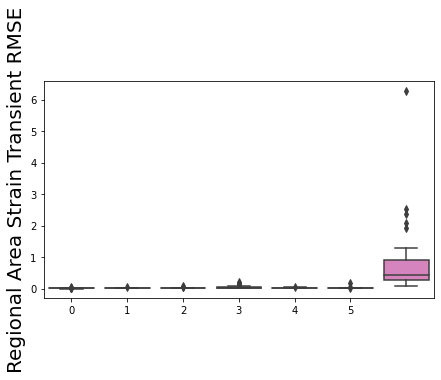

In [24]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,4), facecolor='white', sharey=True)

# regional_rmse=regional_rmse.

data=[regional_rmse[:,i] for i in range(0, len(regions))]
data.append(global_rmse)
sns.boxplot(ax=ax1, data=data, orient='v')

plt.ylabel("Regional Area Strain Transient RMSE", fontsize=20)
regions.append("global")
plt.xticks(np.arange(6), regions, fontsize=15)

fig.tight_layout()

# plt.yticks(np.arange(0.0, 4.5, 0.5), fontsize=15
#           )
plt.ylim(0.0, 0.2250)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/Presentations/Cemrg_25_11_2022/area_strain_regional_rmse.png", dpi=200, bbox_inches="tight")

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,4), facecolor='white', sharey=True)

data=[regional_rmse[:,i] for i in range(0, len(regions))]
data.append(global_rmse)
sns.boxplot(ax=ax1, data=data, orient='v')

sns.boxplot(ax=ax2, data=[strain_rms_40, strain_rms_max], orient='v')

ax1.set_ylabel("Regional Area Strain Transient RMSE", fontsize=20)
regions.append("global")
plt.xticks(np.arange(6), regions, fontsize=15)

fig.tight_layout()

# plt.yticks(np.arange(0.0, 4.5, 0.5), fontsize=15
#           )
plt.ylim(0.0, 0.2250)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/Presentations/Cemrg_25_11_2022/area_strain_regional_rmse.png", dpi=200, bbox_inches="tight")

We see that the discordance between simulated and gt area strains gets larger on a regional mean basis compared with global mean basis. However, both are still less than the cell-by-cell discordance.

# endo_avg f1 fibre strain 

## Cell-by-Cell Discordance

In [25]:
## fibre strain

strain_rms_max = np.zeros((len(all_cases),))
strain_rms_40 = np.zeros((len(all_cases),))

for i in range(0,len(all_cases)):
    case=all_cases[i]
    
    if case in f20_cases:
        path=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9/veri/endo_avg_strain_rmse.txt"
    
    else:
        path=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9/veri/endo_avg_strain_rmse.txt"
        
    data=np.loadtxt(path)
    
    strain_rms_max[i] = max(data)
    strain_rms_40[i] = data[3]

Mean pm Std RMS at t=40 %				 0.43354989694006835 \pm 1.6505001922381948
Mean pm Std RMS at worst performing frame		 0.489115780458512 \pm 1.653007734430403


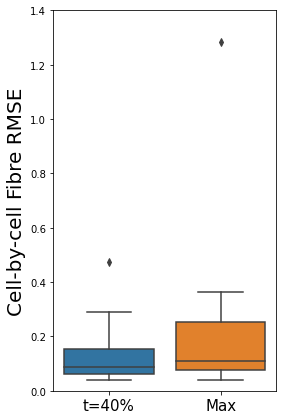

In [26]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,7), facecolor='white', sharey=True)

data=[strain_rms_40, strain_rms_max]
sns.boxplot(ax=ax1, data=data, orient='v')

plt.ylabel("Cell-by-cell Fibre RMSE", fontsize=20)
plt.xticks(np.arange(2), ['t=40%', 'Max'], fontsize=15)
plt.ylim(0.0, 1.4)

mean_40 = np.mean(strain_rms_40)
std_40 = np.std(strain_rms_40)

mean=np.mean(strain_rms_max)
std=np.std(strain_rms_max)

print("Mean pm Std RMS at t=40 %\t\t\t\t", mean_40, "\pm",  std_40)
print("Mean pm Std RMS at worst performing frame\t\t", mean, "\pm", std)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/Presentations/Cemrg_25_11_2022/fibre_strain_cell_rmse.png", dpi=200, bbox_inches="tight")

## Global Discordance

In [27]:
## fibre strain

global_rmse = np.zeros((len(all_cases),))

for i in range(0,len(all_cases)):
    case=all_cases[i]
#     print(case)
    
    if case in f20_cases:
        trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"
        veriTrackingPath=f"{trackingPath}/veri"
        
    else:
        trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"
        veriTrackingPath=f"{trackingPath}/veri"
                    
    ## WARNING: Make sure here to use percent_regional_strains .txt file!!! Uses percentile filter
    global_gtPath = f"{trackingPath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_global.txt"
    global_simPath = f"{veriTrackingPath}/endo_avg_meanstrains_global.txt"
    
    data_gt=np.loadtxt(global_gtPath)
    data_sim=np.loadtxt(global_simPath)
    
#     print(data_gt.shape)
    
    ## calc rmse in f1 over all time frames
    rmse=mean_squared_error(data_gt[1,:], data_sim[1,:], squared=False)
#     print("Case: ", case, ": ", rmse)
    
    global_rmse[i] = rmse
    
global_rmse=global_rmse/100.

In [28]:
global_rmse.std()*100

1.1840161482392826

([<matplotlib.axis.XTick at 0x7fee679c8be0>], [Text(0, 0, ' ')])

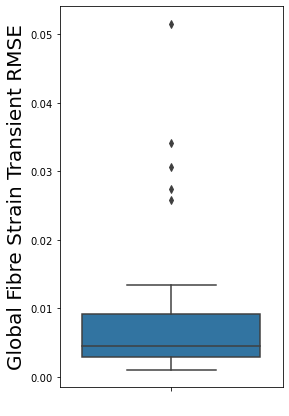

In [29]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,7), facecolor='white', sharey=True)

data=[global_rmse]
sns.boxplot(ax=ax1, data=data, orient='v')

plt.ylabel("Global Fibre Strain Transient RMSE", fontsize=20)
plt.xticks(np.arange(1), [' '], fontsize=15)
# plt.yticks(np.arange(0.0, 4.5, 0.5), fontsize=15
#           )
# plt.ylim(0.0, 4.0)
# plt.savefig("/home/csi20/Dropbox/phd/Documents/Presentations/Cemrg_25_11_2022/rmse.png", dpi=200, bbox_inches="tight")

## Regional Discordance

In [62]:
## regional fibre strain

regions=['global', 'roof', 'sept', 'lat', 'ant', 'post']
regional_rmse = np.zeros((len(all_cases), len(regions)))

for i in range(0,len(all_cases)):
    case=all_cases[i]
#     print(case)

    for j in range(0, len(regions)):
        region=regions[j]
#         print(region)
    
        if case in f20_cases:
            trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"
            veriTrackingPath=f"{trackingPath}/veri"

        else:
            trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"
            veriTrackingPath=f"{trackingPath}/veri"
    
        global_gtPath = f"{trackingPath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt"
        global_simPath = f"{veriTrackingPath}/endo_avg_meanstrains_{region}.txt"
        
        data_gt=np.loadtxt(global_gtPath)[1,:]
        data_sim=np.loadtxt(global_simPath)[1,:]
    
        ## calc rmse over all time frames
        rmse=mean_squared_error(data_gt, data_sim, squared=False)
#         print("Case: ", case, "Region", region, ": ", rmse)
    
        regional_rmse[i,j] = rmse
        
regional_rmse=regional_rmse/100.0

In [63]:
for i in range(0, len(regions)):
    
    mu = regional_rmse[:, i].mean()*100
    sigma = regional_rmse[:, i].std()*100
    
    print(regions[i], "\t", mu, "pm\t", sigma)

global 	 0.9673997103159282 pm	 1.1840161482392826
roof 	 0.9735055340316169 pm	 1.2414134569193003
sept 	 1.2884482674217204 pm	 1.2118900463904119
lat 	 3.0182782952333826 pm	 4.00954303744239
ant 	 1.0732929721663664 pm	 0.6884899553858499
post 	 1.632131840596291 pm	 2.215606833172207


In [64]:
for i in range(0, len(regions)):
    
    median = np.median(regional_rmse[:, i])*100
    
    print(regions[i], "\t", median)

global 	 0.4507149170017362
roof 	 0.5099303227361587
sept 	 1.0876217446012175
lat 	 1.1489905725290368
ant 	 0.8323947966219505
post 	 0.9300436795480076


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (7).

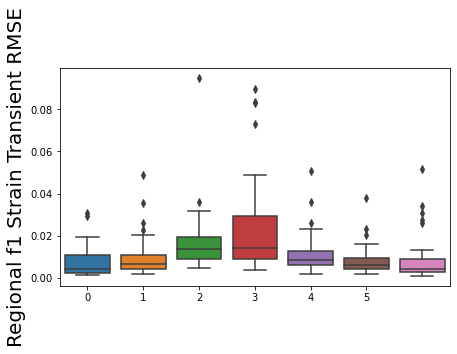

In [33]:
fig, (ax1) = plt.subplots(1,1,figsize=(7,4), facecolor='white', sharey=True)

data=[regional_rmse[:,i] for i in range(0, len(regions))]
data.append(global_rmse)
sns.boxplot(ax=ax1, data=data, orient='v')

plt.ylabel("Regional f1 Strain Transient RMSE", fontsize=20)
regions.append("global")
plt.xticks(np.arange(6), regions, fontsize=15)

plt.ylim(0.0, 0.1)

fig.tight_layout()
# plt.savefig("/home/csi20/Dropbox/phd/Documents/Presentations/Cemrg_25_11_2022/fibre_strain_regional_rmse.png", dpi=200, bbox_inches="tight")

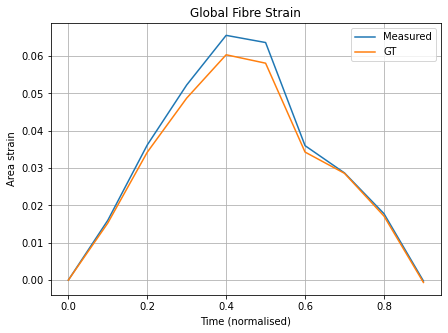

In [34]:
## Visualising cases' global mean strain transients

case='CT-CRT/case08'
# case='EBR/case02'

region='global'

if case in f20_cases:
    trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"
    veriTrackingPath=f"{trackingPath}/veri"

else:
    trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"
    veriTrackingPath=f"{trackingPath}/veri"

global_gtPath = f"{trackingPath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt"
global_simPath = f"{veriTrackingPath}/endo_avg_meanstrains_{region}.txt"

data_gt=np.loadtxt(global_gtPath)
data_sim=np.loadtxt(global_simPath)

data_gt=data_gt/100.
data_sim=data_sim/100.

fig, (ax1) = plt.subplots(1,1,figsize=(7,5))

numTimes=10
normTime=np.arange(0, numTimes)/numTimes

ax1.plot(normTime, data_sim[0,:], label="Measured")
ax1.plot(normTime, data_gt[0,:], label='GT')

ax1.set_title(f'Global Fibre Strain')

ax1.set(xlabel='Time (normalised)')
ax1.set(ylabel='Area strain')
ax1.label_outer()
ax1.legend()
ax1.grid(True)

# plt.savefig("/home/csi20local/Documents/Presentations/Cemrg_25_11_2022/fibre_strain_global_transient.png", dpi=200, bbox_inches="tight")

In [35]:
regions

['global', 'roof', 'sept', 'lat', 'ant', 'post', 'global']

roof
sept
lat
ant
post


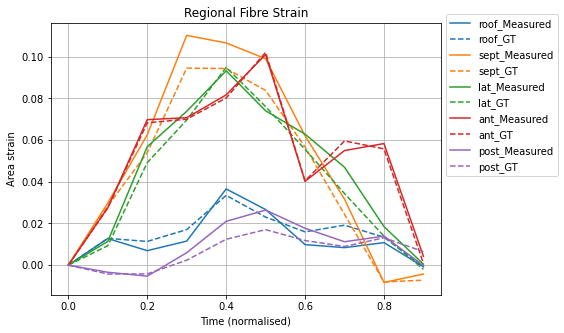

In [36]:
## Visualising cases' regional fibre strain transients

case='CT-CRT/case08'
# case='EBR/case02'

regions=['roof', 'sept', 'lat', 'ant', 'post']

regional_fibre_strains_gt=np.zeros((len(regions),10))
regional_fibre_strains_sim=np.zeros((len(regions),10))

for i in range(0,len(regions)):
    region=regions[i]
    print(region)
    
    if case in f20_cases:
        trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"
        veriTrackingPath=f"{trackingPath}/veri"

    else:
        trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"
        veriTrackingPath=f"{trackingPath}/veri"

    global_gtPath = f"{trackingPath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt"
    global_simPath = f"{veriTrackingPath}/endo_avg_meanstrains_{region}.txt"

    data_gt=np.loadtxt(global_gtPath)
    data_sim=np.loadtxt(global_simPath)
    
    regional_fibre_strains_gt[i]=data_gt[0,:]
    regional_fibre_strains_sim[i]=data_sim[0,:]

regional_fibre_strains_gt=regional_fibre_strains_gt/100.
regional_fibre_strains_sim=regional_fibre_strains_sim/100.

###Plot

fig, (ax1) = plt.subplots(1,1,figsize=(7,5))

numTimes=10
normTime=np.arange(0, numTimes)/numTimes

colors_list=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

for i in range(0, len(regions)):
    ax1.plot(normTime, regional_fibre_strains_sim[i,:], label=f"{regions[i]}_Measured", c=colors_list[i])
    ax1.plot(normTime, regional_fibre_strains_gt[i,:], label=f"{regions[i]}_GT", ls='--', c=colors_list[i])

ax1.set_title(f'Regional Fibre Strain')

ax1.set(xlabel='Time (normalised)')
ax1.set(ylabel='Area strain')
ax1.label_outer()
ax1.legend(bbox_to_anchor=(1.0, 1.05))
ax1.grid(True)

# plt.savefig("/home/csi20local/Documents/Presentations/Cemrg_25_11_2022/fibre_strain_regional_transient.png", dpi=200, bbox_inches="tight")

## Absolute Difference in Reservoir Strain

In [37]:
regions_incl_global = ['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [38]:
abs_res_diffs = np.zeros((len(all_cases),6))

for i in range(0, len(all_cases)):
    case=all_cases[i]

    for j in range(0, len(regions_incl_global)):
        region = regions_incl_global[j]
        
        if case in f20_cases:
            filepath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"

        else:
            filepath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"

        gt_data = np.loadtxt(f"{filepath}/area_meanstrains_{region}_excl_PVs.txt")
        res_strain_gt = np.ptp(gt_data)

        trk_data = np.loadtxt(f"{filepath}/veri/area_meanstrains_{region}_excl_PVs.txt")
        res_strain_trk = np.ptp(trk_data)

        abs_diff = res_strain_gt-res_strain_trk
        abs_res_diffs[i, j] = abs_diff

In [39]:
for i in range(0, len(regions_incl_global)):
    
    mu = np.abs(abs_res_diffs[:, i]).mean()
    sigma = np.abs(abs_res_diffs[:, i]).std()
    
    print(regions_incl_global[i], "\t", mu, "pm\t", sigma)

global 	 1.2019400763975556 pm	 2.1970312521534234
roof 	 1.3726706267890025 pm	 2.0436510566701536
sept 	 1.969714753419617 pm	 2.388706699374205
lat 	 4.219251067701102 pm	 6.081138025325586
ant 	 1.6309746048950338 pm	 1.4220347976486911
post 	 2.459594610712196 pm	 5.437181424561351


In [41]:
for i in range(0, len(regions_incl_global)):
    
    median = np.median(np.abs(abs_res_diffs[:, i]))
    print(regions_incl_global[i], "\t", median)

global 	 0.5353651783775977
roof 	 0.8666501072273285
sept 	 1.299581606951559
lat 	 1.6143588444645154
ant 	 1.0714661602370512
post 	 0.7745108816113575


Text(0, 0.5, 'Absolute Area Reservoir Strain Difference [%]:\nMeasured vs True')

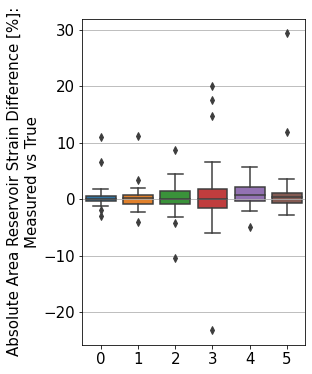

In [43]:
fig, ax1 = plt.subplots(1,1,figsize=(4,6))

data_to_plot = [abs_res_diffs[:, j] for j in range(0, 6)]
sns.boxplot(data=abs_res_diffs, ax=ax1)

ax1.tick_params(axis='both', labelsize=15)
ax1.grid(axis='y')
ax1.set_ylabel("Absolute Area Reservoir Strain Difference [%]:\nMeasured vs True", fontsize=15)

In [44]:
regions_incl_global_v2 = ['global', 'post', 'sept', 'lat', 'ant', 'inf']

Text(0.42, 0.01, 'Region')

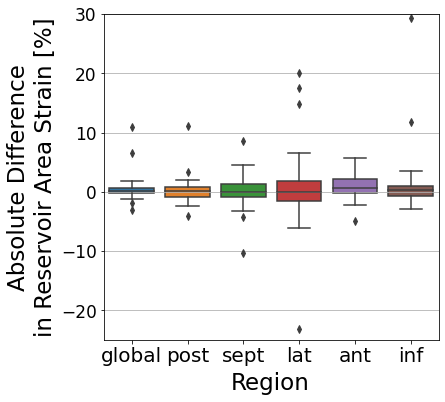

In [45]:
fig, ax1 = plt.subplots(1,1,figsize=(6,6))

data_to_plot = [abs_res_diffs[:, j] for j in range(0, 6)]
sns.boxplot(data=abs_res_diffs, ax=ax1)

ax1.tick_params(axis='both', labelsize=17)
ax1.grid(axis='y')
ax1.set_ylabel("Absolute Difference\nin Reservoir Area Strain [%]", fontsize=23)

ax1.set_xticks(np.arange(6))
ax1.set_xticklabels(regions_incl_global_v2, fontsize=20)

ax1.set_ylim(-25, 30)

fig.text(0.42, 0.01, "Region", fontsize=23)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/GOLDEN_slides/abs_diff_strain_2.png", dpi=200, bbox_inches="tight")

In [46]:
regions_incl_global

['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [47]:
## Visualise case strain transients

case='CT-CRT/case08'

gt_gl_strain=np.zeros((6,10))
trk_gl_strain=np.zeros((6,10))

for i in range(0, len(regions_incl_global)):
    region = regions_incl_global[i]
    
    gt_gl_strain[i, :] = np.loadtxt(f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9/area_meanstrains_{region}_excl_PVs.txt")
    trk_gl_strain[i, :] = np.loadtxt(f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9/veri/area_meanstrains_{region}_excl_PVs.txt")

In [48]:
gt_gl_strain

array([[ 0.        ,  2.89578769,  5.67657948, 12.05095629, 16.16013464,
        15.52732903, 10.83617935,  8.78944724,  5.56156319, -0.23722602],
       [ 0.        ,  2.33228341,  2.50376654,  4.04960398,  5.77580757,
         4.9646183 ,  4.01110989,  3.33649284,  2.64325389,  0.16420323],
       [ 0.        ,  6.10730742, 10.07851088, 19.66921691, 23.02127123,
        20.37930206, 12.63586282,  9.32038143,  1.22173042, -1.02490614],
       [ 0.        , -1.86208485,  3.22769169, 16.45865098, 26.04059222,
        24.68406605, 21.10141857, 12.47046111,  6.07895575, -0.51471055],
       [ 0.        ,  5.44540514,  7.29329214, 11.11304322, 15.07787525,
        16.57817092,  7.87051142, 10.47055225, 11.86382721, -0.42766852],
       [ 0.        ,  0.91244822,  5.17563042, 12.08080266, 16.33466619,
        16.48927828, 13.56935185, 11.09239973,  7.3570705 ,  0.51510237]])

In [49]:
trk_gl_strain

array([[ 0.        ,  2.61710788,  5.53545906, 11.9002758 , 15.74995988,
        14.80929809, 10.32978918,  8.46968235,  5.37341363,  0.11281556],
       [ 0.        ,  1.88514445,  2.09128188,  3.82453547,  6.19902196,
         4.78609605,  3.84277269,  2.78075158,  2.71206688,  0.17646976],
       [ 0.        ,  6.14441038, 10.63362396, 20.89452335, 23.4434953 ,
        20.72501316, 12.76484751,  9.85649283,  1.44796177, -0.02704478],
       [ 0.        , -1.58425731,  4.91147055, 16.20618315, 24.71633205,
        23.18446211, 20.63721343, 12.71529088,  5.74530922,  0.05184703],
       [ 0.        ,  4.1436129 ,  5.43866989,  9.09751651, 12.47751617,
        13.27145463,  5.396484  ,  8.6964708 , 10.69698307, -0.35626087],
       [ 0.        ,  1.17826391,  5.06870623, 12.54166998, 16.86605438,
        17.17885998, 13.94706586, 11.2528551 ,  7.50146971,  0.72958815]])

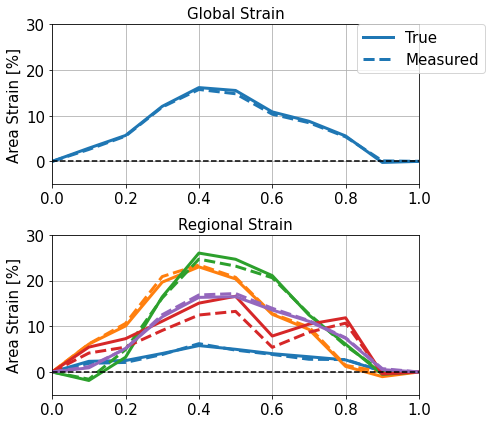

In [50]:
fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(7,6))

## Make a plot

## Plot global
y_gt = list(gt_gl_strain[0, :])
y_gt.append(0)
y_trk = list(trk_gl_strain[0, :])
y_trk.append(0)

ax1.plot(np.arange(0, 1.1, 0.1), y_gt, lw=3, label="True")
ax1.plot(np.arange(0, 1.1, 0.1), y_trk, lw=3, ls='--', label="Measured", c='tab:blue')


ax1.set_title("Global Strain", fontsize=15)
ax2.set_title("Regional Strain", fontsize=15)

## Plot regional
colors_list=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

for i in range(1, len(regions_incl_global)):
    region = regions_incl_global[i]
    
    y_gt = list(gt_gl_strain[i, :])
    y_gt.append(0)
    ax2.plot(np.arange(0, 1.1, .1), y_gt, lw=3, label="GT")
    
    y_trk = list(trk_gl_strain[i, :])
    y_trk.append(0)
    ax2.plot(np.arange(0, 1.1, .1), y_trk, lw=3, ls='--', label=regions_incl_global[i], c=colors_list[i-1])
    
# ax2.legend()
    
for j in range(0, len(fig.axes)):
    fig.axes[j].plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')
    fig.axes[j].tick_params(labelsize=15)
    fig.axes[j].grid()
    fig.axes[j].set_ylabel("Area Strain [%]", fontsize=15)
    fig.axes[j].set_xlim(-0.0, 1.0)
    
ax1.set_ylim(-5, 30)
ax2.set_ylim(-5, 30)
    
ax1.legend(fontsize=15, bbox_to_anchor=(1.2, 1.05))

plt.tight_layout()

# plt.savefig("/home/csi20/Dropbox/phd/Documents/GOLDEN_slides/veri_strain_curves_2.png", dpi=200, bbox_inches="tight")

In [51]:
case_ind = 1

y = list(nonaf_strains[0, case_ind, i+1, :])
y.append(0)
ax1.plot(np.arange(0, 1.1, 0.1), y, lw=3)

for i in range(0, len(regions)-1):
    y = list(nonaf_strains[0, case_ind, i+1, :])
    y.append(0)
    ax2.plot(np.arange(0, 1.1, 0.1), y, lw=3, label=regions_v2[i+1])
    
ax2.legend(fontsize=15, bbox_to_anchor=(1.0, 1.05))
ax2.set_xlabel("time (normalised)", fontsize=15)

ax1.set_xlim(-0.0, 1.0)
ax2.set_xlim(-0.0, 1.0)
ax1.set_ylim(-5, 25)
ax2.set_ylim(-5, 25)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='both', labelsize=15)
    fig.axes[i].plot(np.arange(0, 1.1, 0.1), [0]*11, ls='--', c='black')
    fig.axes[i].set_ylabel("Area Strain [%]", fontsize=15)

ax1.grid()
ax2.grid()

ax1.set_title("Global Strain", fontsize=15)
ax2.set_title("Regional Strain", fontsize=15)

plt.tight_layout()


# plt.savefig("/home/csi20local/Dropbox/phd/Documents/GOLDEN_slides/strain_curves.png", dpi=200, bbox_inches="tight")

NameError: name 'nonaf_strains' is not defined

## Absolute differences in fiber reservoir strains

In [59]:
## regional fibre strain

regions=['global', 'roof', 'sept', 'lat', 'ant', 'post']
fib_abs_res_diff = np.zeros((len(all_cases), len(regions)))

for i in range(0,len(all_cases)):
    case=all_cases[i]
#     print(case)

    for j in range(0, len(regions)):
        region=regions[j]
#         print(region)
    
        if case in f20_cases:
            trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"
            veriTrackingPath=f"{trackingPath}/veri"

        else:
            trackingPath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"
            veriTrackingPath=f"{trackingPath}/veri"
    
        global_gtPath = f"{trackingPath}/percent_regional_strains/endo_avg_excl_PVs_percent_meanstrains_{region}.txt"
        global_simPath = f"{veriTrackingPath}/endo_avg_meanstrains_{region}.txt"
        
        ## Extract strain transient for either f0 or f1
        data_gt=np.loadtxt(global_gtPath)[0]
        data_sim=np.loadtxt(global_simPath)[0]
        
        gt_res=np.ptp(data_gt)
        sim_res=np.ptp(data_sim)
        
        abs_diff = gt_res-sim_res
        fib_abs_res_diff[i, j]=abs_diff

In [60]:
for i in range(0, len(regions)):
    
    mu = np.abs(fib_abs_res_diff[:, i]).mean()
    sigma = np.abs(fib_abs_res_diff[:, i]).std()
    
    print(regions[i], "\t", mu, "\tpm\t", sigma)

global 	 1.0076793446831653 	pm	 1.2748278293661819
roof 	 1.3010960311134743 	pm	 1.7081559415105865
sept 	 2.103074119854815 	pm	 2.841897214770711
lat 	 3.6730754832614334 	pm	 5.447129634375898
ant 	 1.4411912672446812 	pm	 1.6406438925548457
post 	 1.0961420217213989 	pm	 1.0059992475623531


In [61]:
for i in range(0, len(regions)):
    
    median = np.median(np.abs(fib_abs_res_diff[:, i]))
    
    print(regions[i], "\t", median)

global 	 0.4020738235540007
roof 	 0.6142402268956151
sept 	 1.3304440387291985
lat 	 1.1568784584903886
ant 	 1.051636139448098
post 	 0.8882002851095496


In [44]:
abs_res_diffs = np.zeros((len(all_cases),6))

for i in range(0, len(all_cases)):
    case=all_cases[i]

    for j in range(0, len(regions_incl_global)):
        region = regions_incl_global[j]
        
        if case in f20_cases:
            filepath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"

        else:
            filepath=f"/home/csi20local/Data/RG_CT_Cases/{case}/MT-HiRes/SW-0.0-BE-1e-9"

        gt_data = np.loadtxt(f"{filepath}/area_meanstrains_{region}_excl_PVs.txt")
        res_strain_gt = np.ptp(gt_data)

        trk_data = np.loadtxt(f"{filepath}/veri/area_meanstrains_{region}_excl_PVs.txt")
        res_strain_trk = np.ptp(trk_data)

        abs_diff = res_strain_gt-res_strain_trk
        abs_res_diffs[i, j] = abs_diff